# EDA for Kaggle dataset

### Import required packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

### 2.3 Import the CSV data as Pandas dataframe

In [6]:
df = pd.read_csv("../data/bank.csv")
df_origin = df.copy()
df.dropna(inplace=True) 
print(df.head()) 

   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  


### Correlation & Heatmap

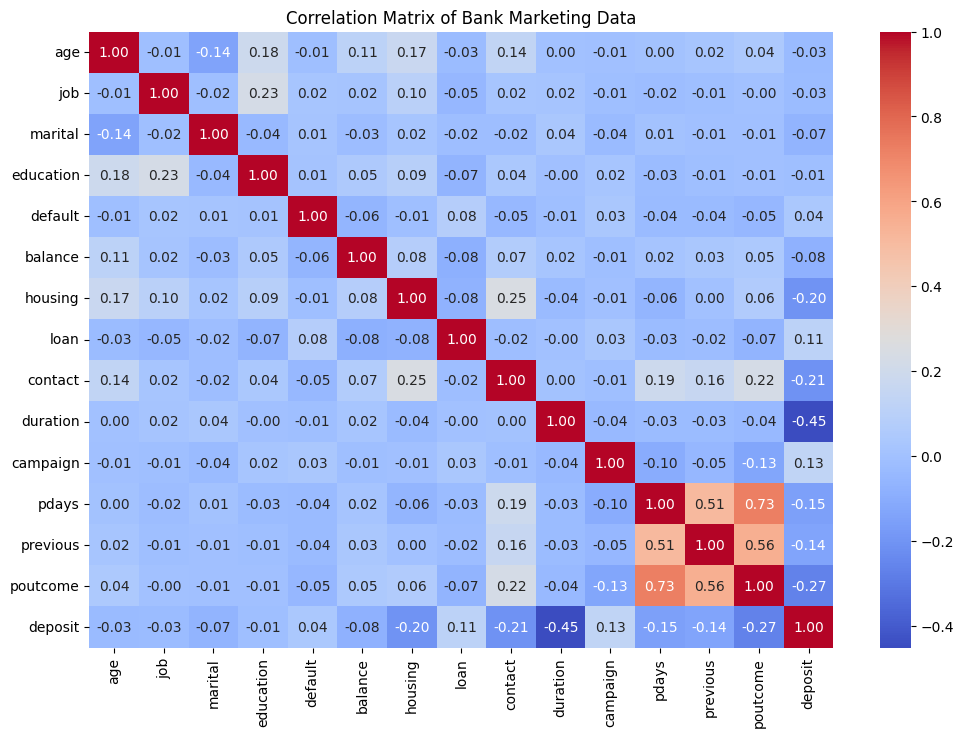

In [7]:
df['job'] = pd.factorize(df['job'])[0]
df['marital'] = pd.factorize(df['marital'])[0]
df['education'] = pd.factorize(df['education'])[0]
df['default'] = pd.factorize(df['default'])[0]
df['housing'] = pd.factorize(df['housing'])[0]
df['loan'] = pd.factorize(df['loan'])[0]
df['contact'] = pd.factorize(df['contact'])[0]
df['poutcome'] = pd.factorize(df['poutcome'])[0]
df['deposit'] = pd.factorize(df['deposit'])[0]

df_cleaned = df.drop(columns=['month', 'day'])

corr_matrix = df_cleaned.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Bank Marketing Data')
plt.show()

### Age Distribution

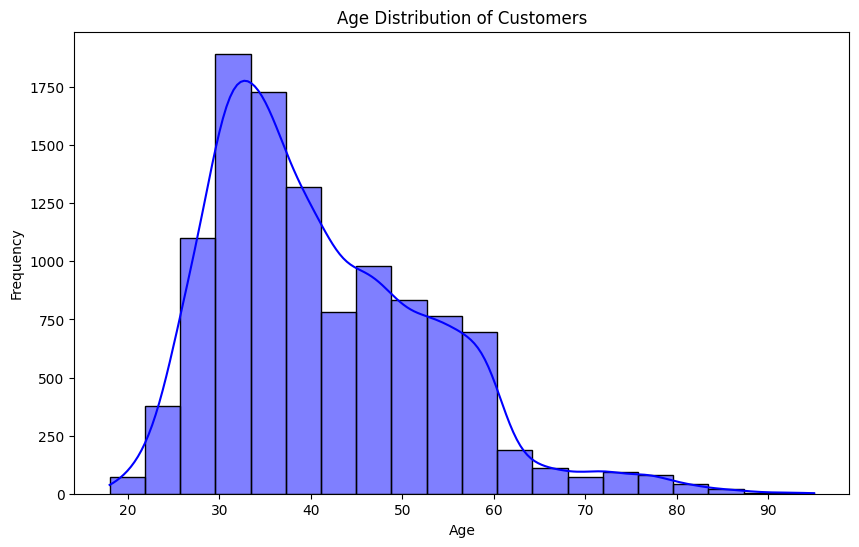

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, bins=20, color='blue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

The age group that we should target for marketing - for this specific Term Deposit Subcription, is the 30s

### Job Roles Distribution

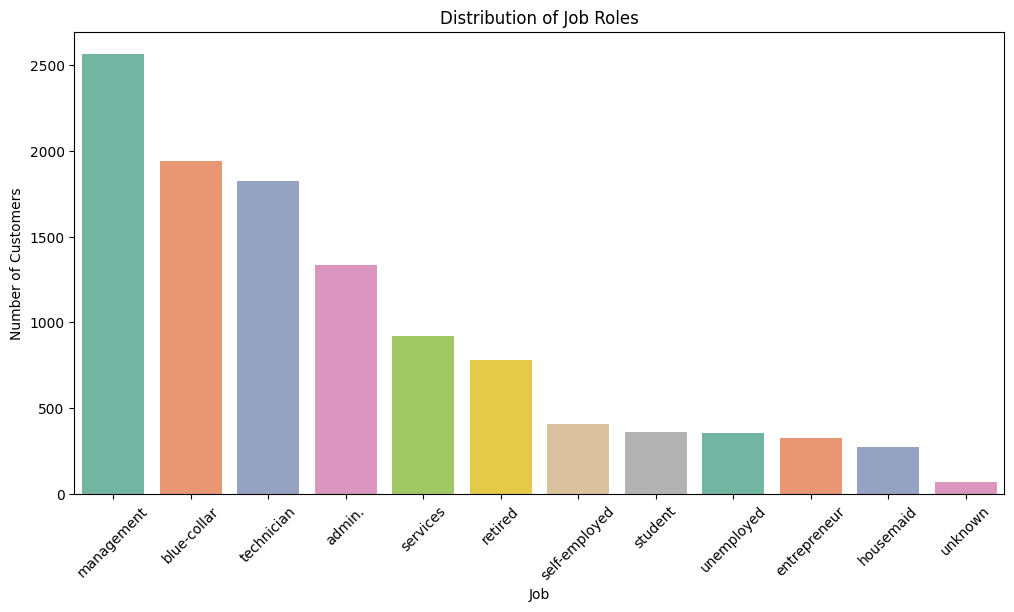

In [19]:
df = pd.read_csv("../data/bank.csv")

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='job', order=df['job'].value_counts().index, palette='Set2')
plt.title('Distribution of Job Roles')
plt.xticks(rotation=45)
plt.xlabel('Job')
plt.ylabel('Number of Customers')
plt.show()

Majority of the customers are in Management / Blue-Collared Jobs / Technician. Targetting these groups may see a higher conversion rate for marketing campaigns.

### Education level vs Deposit subscription

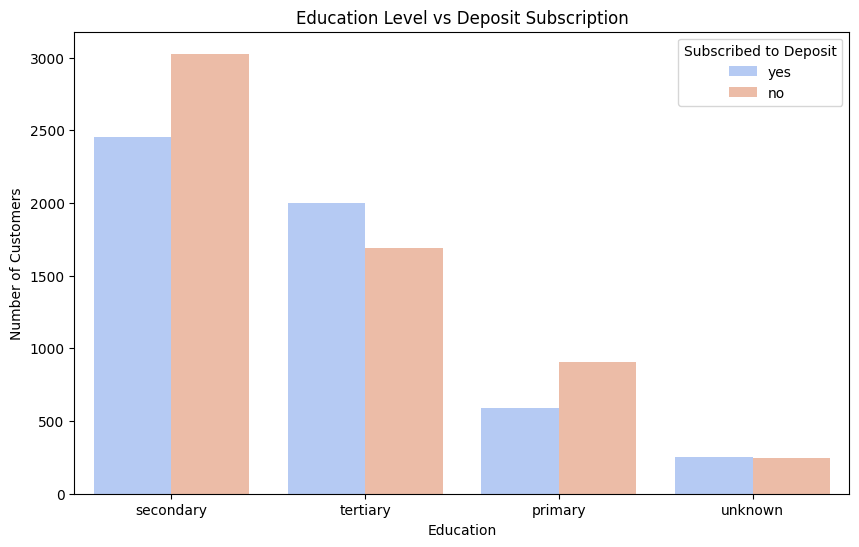

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='education', hue='deposit', palette='coolwarm')
plt.title('Education Level vs Deposit Subscription')
plt.xlabel('Education')
plt.ylabel('Number of Customers')
plt.legend(title='Subscribed to Deposit')
plt.show()

Only Tertiary educated customers have a higher proportion of subscribing to Term Deposit Subscriptions

### Loan status vs Deposit subscription

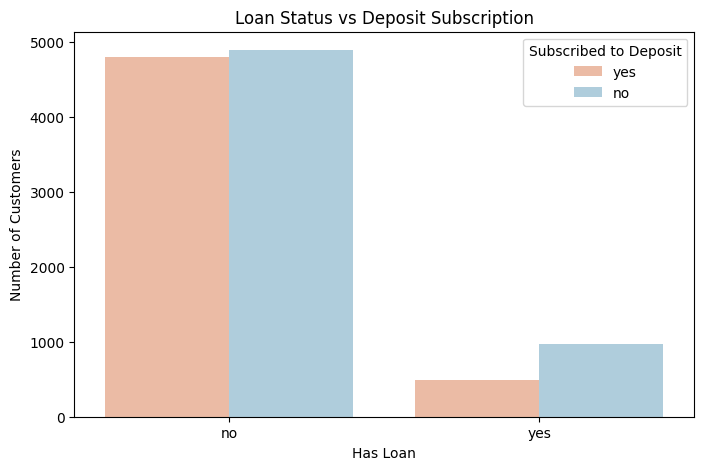

In [21]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='loan', hue='deposit', palette='RdBu')
plt.title('Loan Status vs Deposit Subscription')
plt.xlabel('Has Loan')
plt.ylabel('Number of Customers')
plt.legend(title='Subscribed to Deposit')
plt.show()

Generally, there are more people who would not subscribe to the Term Deposit Subscription, with or without loans.

### Balance vs Deposit subscription

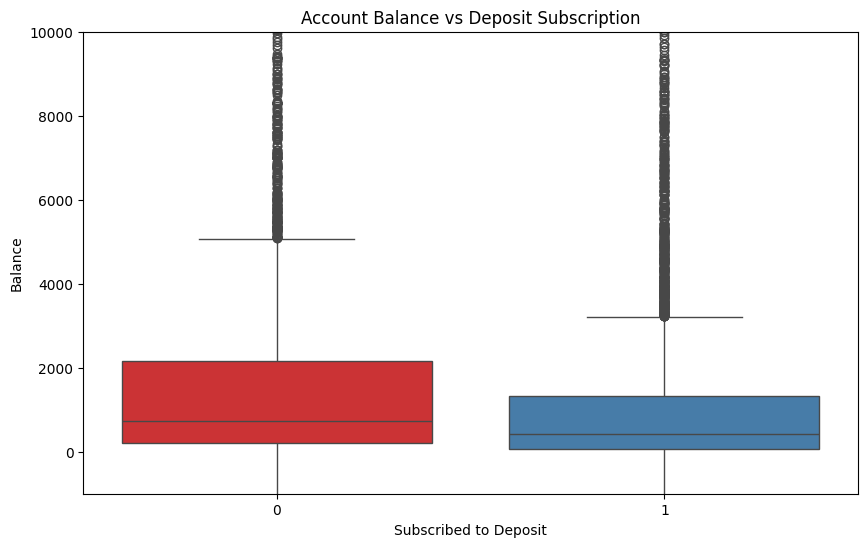

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='deposit', y='balance', palette='Set1')
plt.title('Account Balance vs Deposit Subscription')
plt.xlabel('Subscribed to Deposit')
plt.ylabel('Balance')
plt.ylim(-1000, 10000)
plt.show()

We can see that people with higher balance in their bank accounts have a higher probability of subscribing to Term Deposit Subscriptions.

### Previous campaign contacts vs Deposit subscription

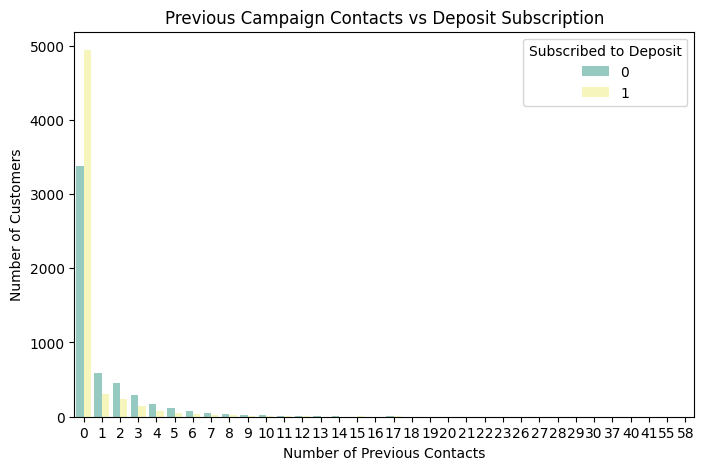

In [13]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='previous', hue='deposit', palette='Set3')
plt.title('Previous Campaign Contacts vs Deposit Subscription')
plt.xlabel('Number of Previous Contacts')
plt.ylabel('Number of Customers')
plt.legend(title='Subscribed to Deposit')
plt.show()